# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import string

from scipy.stats import linregress

# Import weather key
from config import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [66]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations, use size=500
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(string.capwords(city))

# Print the city count to confirm sufficient count
len(cities)

50

In [67]:
#practice creating a dictionary and saving dictionary to csv file
city_dict = {
    "city": cities,
    "lat": lats,
    "long": lngs,
}
city_data = pd.DataFrame(city_dict)


export_csv = city_data.to_csv (output_data_file, index = None, header=True)

city_data.head()


,city,lat,long
0,Neepawa,50.930214,-98.576484
1,Banjar,-14.626880,105.437135
2,Mataura,-44.273294,-143.621425
3,Dikson,70.778914,79.500791
4,Richards Bay,-32.964368,36.245899


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [83]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={wkey}&units={units}&q="

# set up lists to hold reponse info
latitude = []
longitude = []
temp = []
humidity = []
cloud = []
wind = []
mycity = []

myCounter = 0

cities = ["Paris", "London", "Oslo", "Beijing"]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
    

        
        print(response)

        longitude.append(response['coord']['lon'])
        latitude.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        mycity.append(city)
    
    #myCounter = myCounter+1
    #if myCounter == 5:
     #   break  
    except:
        print("City Not found")
        pass
    

{'coord': {'lon': 2.35, 'lat': 48.86}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.94, 'pressure': 1008, 'humidity': 87, 'temp_min': 12.78, 'temp_max': 15}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1569363307, 'sys': {'type': 1, 'id': 6550, 'message': 0.0079, 'country': 'FR', 'sunrise': 1569390045, 'sunset': 1569433445}, 'timezone': 7200, 'id': 2988507, 'name': 'Paris', 'cod': 200}
{'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 14.72, 'pressure': 1002, 'humidity': 93, 'temp_min': 13.89, 'temp_max': 15.56}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 210}, 'rain': {'1h': 0.51}, 'clouds': {'all': 75}, 'dt': 1569363204, 'sys': {'type': 1, 'id': 1412, 'message': 0.0099, 'country': 'GB', 'sunrise': 1569304147, 'sunset': 1569347776}, 'tim

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [71]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": mycity,
    "lat": latitude,
    "long": longitude,
    "temp": temp,
    "humidity": humidity,
    "wind speed": wind,
    "clouds": cloud
}
weather_data = pd.DataFrame(weather_dict)

# print result to file
export_csv = weather_data.to_csv (output_data_file, index = None, header=True)

#display the data frame
weather_data

,city,lat,long,temp,humidity,wind speed,clouds
0,Neepawa,50.23,-99.46,17.00,59,6.20,75
1,Banjar,-7.37,108.54,22.20,90,0.29,75
2,Mataura,-46.19,168.86,7.78,74,4.92,100
3,Dikson,73.51,80.55,2.30,96,9.63,100
4,Richards Bay,-28.77,32.06,19.10,76,15.02,33
5,Peshkopi,41.68,20.43,17.00,93,1.59,0
6,Nikolskoye,59.70,30.79,2.92,69,1.00,0
7,Chalus,36.66,51.42,21.00,83,2.55,75
8,Coquimbo,-29.95,-71.34,13.00,71,5.70,0
9,Olga,34.11,-118.17,30.05,45,1.50,1


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

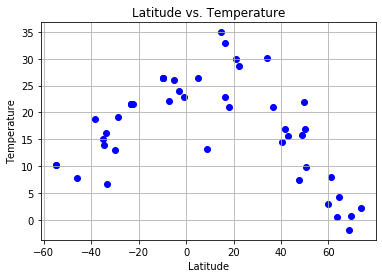

In [87]:
#scatter plot
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.title("Latitude vs. Temperature")

plt.scatter(weather_data["lat"],weather_data["temp"],color="blue",marker="o")
plt.grid()

#plt.legend(loc=2)
plt.savefig('figure_1_Latitude_vs_Temperature.pdf', dpi=300)  
plt.show()

#### Latitude vs. Humidity Plot

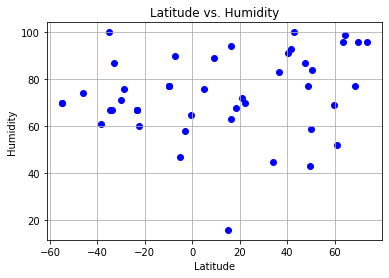

In [86]:
#scatter plot
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.title("Latitude vs. Humidity")

plt.scatter(weather_data["lat"],weather_data["humidity"],color="blue",marker="o")
 
plt.grid()
#plt.legend(loc=2)
plt.savefig('figure_2_Latitude_vs_Humidity.pdf', dpi=300)  
plt.show()

#### Latitude vs. Cloudiness Plot

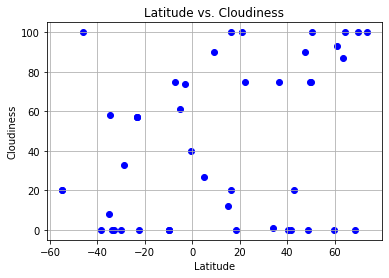

In [85]:
#scatter plot
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title("Latitude vs. Cloudiness")

plt.scatter(weather_data["lat"],weather_data["clouds"],color="blue",marker="o")

plt.grid() 
#plt.legend(loc=2)
plt.savefig('figure_3_Latitude_vs_Cloudiness.pdf', dpi=300)  
plt.show()

#### Latitude vs. Wind Speed Plot

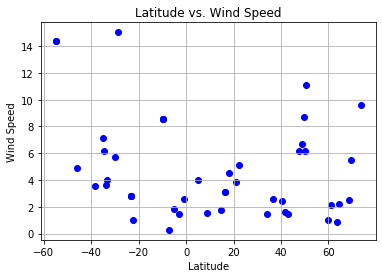

In [81]:
#scatter plot
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.title("Latitude vs. Wind Speed")

plt.scatter(weather_data["lat"],weather_data["wind speed"],color="blue",marker="o")
plt.grid()
#plt.legend(loc=2)
plt.savefig('figure_4_Latitude_vs_WindSpeed.pdf', dpi=300)  

plt.show()



## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


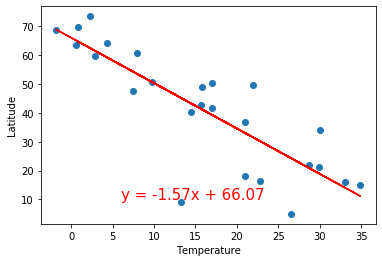

In [84]:
# Create Northern and Southern Hemisphere DataFrames
x_values = weather_data.loc[weather_data["lat"]>0]["temp"]
y_values = weather_data.loc[weather_data["lat"]>0]["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression